### Трегубович Е.И., m3206
#### вариант 4
# Лабораторная работа №4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, anderson, ttest_ind, mannwhitneyu, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

## Задача 1
Проверить, можно ли аппроксимировать распределение популярности песен нормальным законом.

Гипотезы:
- H0: распределение популярности песен не отличается от нормального распределения.
- H1: распределение популярности песен отличается от нормального распределения.

Критерии:
- Критерий Шапиро-Уилка
- Критерий Андерсона-Дарлинга


In [ ]:
data = pd.read_csv('song_data.csv')
popularity = data['song_popularity']

# Проверка нормальности распределения с помощью критерия Шапиро-Уилка
stat, p = shapiro(popularity)
print('Shapiro-Wilk test:')
print('Statistic:', stat)
print('p-value:', p)

# Проверка нормальности распределения с помощью критерия Андерсона-Дарлинга
result = anderson(popularity, dist='norm')
print('Anderson-Darling test:')
for i in range(len(result.critical_values)):
  r, p = result.significance_level[i], result.critical_values[i]
  print('p-value:', p)

Shapiro-Wilk test:
Statistic: 0.9732723832130432
p-value: 0.0
Anderson-Darling test:
p-value: 0.576
p-value: 0.656
p-value: 0.787
p-value: 0.918
p-value: 1.092


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


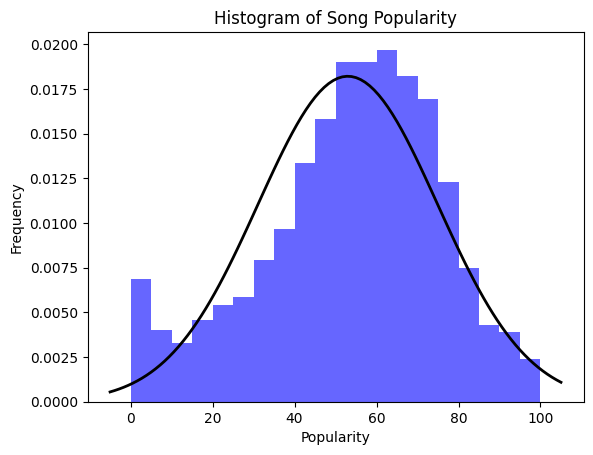

In [ ]:
# Определение параметров нормального распределения
mu, std = norm.fit(popularity)

# Построение гистограммы
plt.hist(popularity, bins=20, density=True, alpha=0.6, color='b')

# Построение нормального распределения с такими же параметрами
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Histogram of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")

plt.show()

## Задача 2
Проверить, отличается ли распределение рейтинга key песен в зависимости от продолжительности песен.

Гипотезы:
- H0: распределение рейтинга key для длинных и коротких песен не отличается.
- H1: распределение рейтинга key для длинных и коротких песен отличается.

Критерии:
- Критерий Стьюдента для независимых выборок
- Критерий Манна-Уитни для независимых выборок

In [ ]:
# Разделение песен на длинные и короткие
mean_duration = data['song_duration_ms'].mean()
long_songs = data[data['song_duration_ms'] > mean_duration]
short_songs = data[data['song_duration_ms'] <= mean_duration]

# Проверка различий в распределении рейтинга key с помощью критерия Стьюдента
t, p = ttest_ind(long_songs['key'], short_songs['key'], equal_var=False)
print('Student t-test:')
print('Statistic:', t)
print('p-value:', p)

# Проверка различий в распределении рейтинга key с помощью критерия Манна-Уитни
u, p = mannwhitneyu(long_songs['key'], short_songs['key'])
print('Mann-Whitney U test:')
print('Statistic:', u)
print('p-value:', p)


Student t-test:
Statistic: -1.3097114885836032
p-value: 0.19031080398953312
Mann-Whitney U test:
Statistic: 42873513.5
p-value: 0.1509422162874669


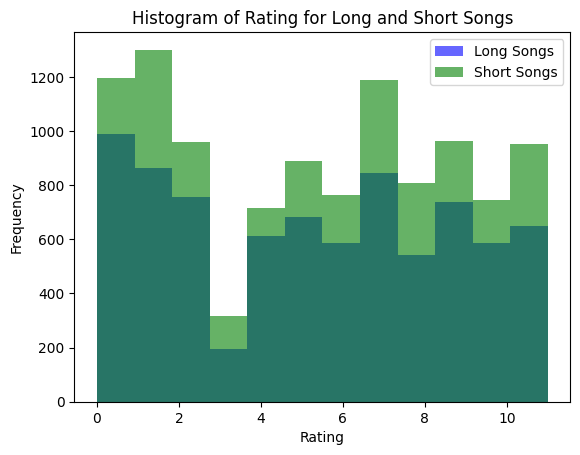

In [ ]:
plt.hist(long_songs['key'], bins=12, alpha=0.6, color='b', label='Long Songs')
plt.hist(short_songs['key'], bins=12, alpha=0.6, color='g', label='Short Songs')
plt.legend(loc='upper right')
plt.title("Histogram of Rating for Long and Short Songs")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

p-value > 0,05, гипотеза H0 о равенстве распределений верна

## Задача 3
Проверить, зависит ли популярность песни от продолжительности.

Гипотезы:
- H0: популярность песни не зависит от продолжительности.
- H1: популярность песни зависит от продолжительности.

Критерии:
- Коэффициент корреляции Пирсона
- Коэффициент корреляции Спирмена



In [ ]:
# Проверка связи между продолжительностью и популярностью песен с помощью коэффициента корреляции Пирсона
print('Pearsonr test:')
r, p = pearsonr(data['song_duration_ms'], data['song_popularity'])
print('p-value:', p)

# Проверка связи между продолжительностью и популярностью песен с помощью коэффициента корреляции Спирмена
print('Spearmanr test:')
r, p = spearmanr(data['song_duration_ms'], data['song_popularity'])
print('p-value:', p)


Pearsonr test:
p-value: 0.00949143262502342
Spearmanr test:
p-value: 0.01299572976330429


p-value < 0.05, гипотеза H1 о зависимости популярности от продолжительности подтверждается.